In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from get_iris import *
from feature_extractor import *

# Imagen de ejemplo

In [3]:
db_path = '../CASIA-IrisV3'
db_path_interval = db_path + '/CASIA-Iris-Interval'
db_path_lamp     = db_path + '/CASIA-Iris-Lamp'
db_path_twins    = db_path + '/CASIA-Iris-Twins'

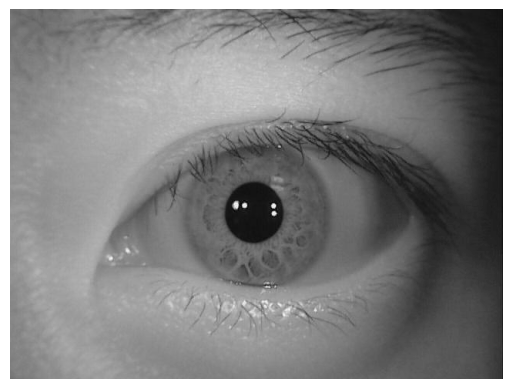

In [4]:
path_ex_casiav1 = '../CASIA-IrisV1/1/001_1_1.jpg'
path_ex_casiav3 =  db_path_lamp + '/005/L/S2005L03.jpg'
img1_ex = cv2.imread(path_ex_casiav3, 0)

plt.imshow(img1_ex, cmap='gray')
plt.axis('off')
plt.show()

# Extracción de información desde el iris

Inner circle (x,y,r) = (316.0, 264.0, 38)
Outer circle (x,y,r) = (319.0, 267.0, 96)


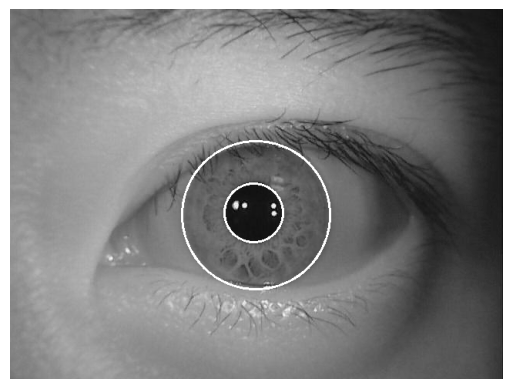

In [5]:
# python-iris-recognition/iris/python/fnc/boundary.py
y_inn, x_inn, r_inn = searchInnerBound(img1_ex)
y_out, x_out, r_out = searchOuterBound(img1_ex, y_inn, x_inn, r_inn)
print(f'Inner circle (x,y,r) = {(x_inn, y_inn, r_inn)}')
print(f'Outer circle (x,y,r) = {(x_out, y_out, r_out)}')

img2_ex = img1_ex.copy()
cv2.circle(img2_ex, (int(x_inn), int(y_inn)), r_inn, (255), thickness=2)
cv2.circle(img2_ex, (int(x_out), int(y_out)), r_out, (255), thickness=2)
plt.imshow(img2_ex, cmap='gray')
plt.axis('off')
plt.show()

In [6]:
segment(img1_ex)

([267, 319, 96],
 [264, 316, 38],
 array([[115., 114., 113., ...,  nan,  nan,  nan],
        [114., 113., 112., ...,  nan,  nan,  nan],
        [112., 111., 110., ...,  nan,  nan,  nan],
        ...,
        [116., 116., 117., ...,  nan,  nan,  nan],
        [115., 115., 115., ...,  nan,  nan,  nan],
        [113., 113., 114., ...,  nan,  nan,  nan]]))

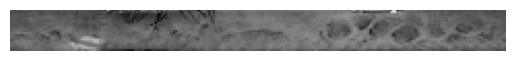

(20, 240)


In [7]:
norm = normalize(img1_ex, x_inn, y_inn, r_inn, x_out, y_out, r_out, 20, 240)
plt.imshow(norm[0], cmap='gray')
plt.axis('off')
plt.show()
print(norm[0].shape)

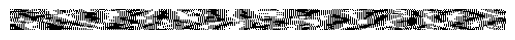

(20, 480)


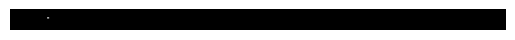

(20, 480)


In [8]:
enc = encode(norm[0], norm[1], minWaveLength, mult, sigmaOnf)

plt.imshow(enc[0],cmap='gray')
plt.axis('off')
plt.show()
print(enc[0].shape)

# Solo son 0s?
plt.imshow(enc[1],cmap='gray')
plt.axis('off')
plt.show()
print(enc[1].shape)

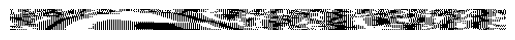

[[  0 255   0 ... 255   0 255]
 [255   0 255 ...   0 255   0]
 [255   0 255 ...   0 255   0]
 ...
 [255 255   0 ... 255 255 255]
 [255 255 255 ...   0 255   0]
 [  0   0   0 ... 255   0 255]]


In [9]:
gi = get_iris(path_ex_casiav1)
plt.imshow(gi,cmap='gray')
plt.axis('off')
plt.show()
print(gi)

# Extracción de características

In [ ]:
model_name = 'vgg16'

db_path = '../CASIA-IrisV3/CASIA-Iris-Lamp'
sel_eye = 'L'
res_path = f'../features_{sel_eye}/{model_name}'

get_features(model_name, db_path, sel_eye, res_path)